In [2]:
import os
import matplotlib. pyplot as plt
import numpy as np
from PIL import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from skimage import io
import tensorflow as tf

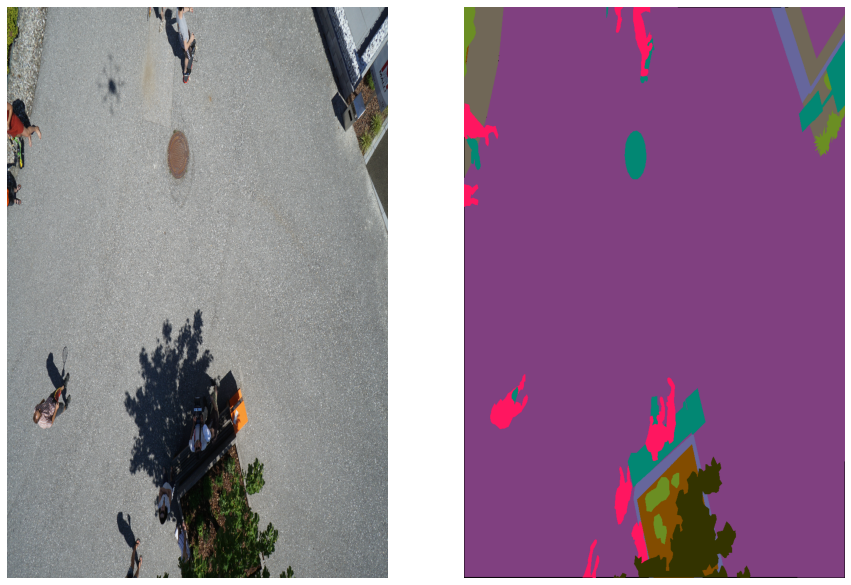

In [3]:
input_paths = '/content/drive/MyDrive/archive/dataset/semantic_drone_dataset/original_images'
output_paths = '/content/drive/MyDrive/archive/RGB_color_image_masks/RGB_color_image_masks'

images_paths = os.listdir(input_paths)
labels_paths = os.listdir(output_paths)
images_paths.sort()
labels_paths.sort()
images_list = [os.path.join(input_paths,i) for i in images_paths]
labels_list = [os.path.join(output_paths,i) for i in labels_paths]

images_names  = tf.constant(images_list)
labels_names = tf.constant(labels_list)

dataset = tf.data.Dataset.from_tensor_slices((images_names,labels_names))

#Load images and labels
def load_img_lab(img_path, lab_path):
    images = tf.io.read_file(img_path)
    images = tf.image.decode_png(images,channels=3)
    images = tf.image.convert_image_dtype(images,tf.float32)
    
    labels = tf.io.read_file(lab_path)
    labels = tf.image.decode_png(labels,channels=3)
    labels = tf.image.convert_image_dtype(labels,tf.float32)
    return images, labels

#Resize iamges and labels
def resize(image, label):
    input_images = tf.image.resize(image,(1200,800),method='nearest')
    input_labels = tf.image.resize(label,(1200,800),method='nearest') 
    return input_images,input_labels

imgs_labs = dataset.map(load_img_lab)
resized_imgs_labs = imgs_labs.map(resize)

for img, lab in resized_imgs_labs.take(1):
    _, axis = plt.subplots(1,2,figsize=(15,15))
    axis[0].imshow(tf.keras.preprocessing.image.array_to_img(img))
    axis[0].axis('off')
    axis[1].imshow(tf.keras.preprocessing.image.array_to_img(lab))
    axis[1].axis('off')